## Prototype Demo

In [1]:
import os
os.chdir("../src/preprocessing") # Note: Change current working directory to load preprocessing functions. Please don't change paths in code
from create_embedding import preprocess_folder, train_embedding_model, apply_embedding_model, combine_embeddings, encode_logo, decode_z
from deepsvg.svglib.svg import SVG
from deepsvg import utils
os.chdir("../..")

In [2]:
import pandas as pd
import numpy as np
import torch
#from IPython.display import SVG, display, display_svg
#from src.models.train_model_head import *
#from src.models.insert_animation import *

### 1 Preprocessing

#### 1.1 Simplify SVGs
Creates simplified SVGs and its tensors on SVG and path level

In [4]:
preprocess_folder(data_folder="data/svgs")

100%|████████████████████████████████████████████████████████████████████████████████| 419/419 [01:51<00:00,  3.77it/s]


In [5]:
preprocess_folder(data_folder="data/decomposed_svgs")

100%|██████████████████████████████████████████████████████████████████████████████| 5561/5561 [02:26<00:00, 37.93it/s]


#### 1.2 Train Embedding Model

In [3]:
model = train_embedding_model(data_folder="data/svgs", num_epochs=1, batch_size=20, save=False)

Parameters
  batch_size = 20
  ckpt_every = 1000
  collate_fn = None
  data_dir = data/svgs_tensors/
  dataloader_module = deepsvg.svgtensor_dataset
  filter_category = None
  filter_labels = None
  filter_platform = None
  filter_uni = None
  grad_clip = 1.0
  learning_rate = 0.001
  loader_num_workers = 4
  log_every = 20
  max_num_groups = 8
  max_seq_len = 30
  max_total_len = 50
  meta_filepath = data/svgs_meta.csv
  model_args = ['commands', 'args', 'commands', 'args']
  model_cfg = <configs.deepsvg.hierarchical_ordered.ModelConfig object at 0x000001591A5B9348>
  nb_augmentations = 1
  num_epochs = 1
  num_gpus = 1
  num_steps = None
  optimizer_starts = [0]
  pretrained_path = ./models/hierarchical_ordered.pth.tar
  stats_to_print = {'train': ['lr', 'time']}
  train_ratio = 1.0
  val_every = 10
  warmup_steps = 500
Loading dataset
Loading pretrained model ./models/hierarchical_ordered.pth.tar
#Parameters: 10,304,596
Epoch 1


#### 1.3 Apply Hierarchical Generative Network
Apply hierarchical generative network to produce latent vector z

In [6]:
model = "models/20210301_1813_model_batch60_epoch30_decomposed_svgs.pth.tar"

In [7]:
svgs_embedding = apply_embedding_model(model_path=model, data_folder="data/svgs", save=False)

100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [00:05<00:00, 35.52it/s]


In [8]:
decomposed_svgs_embedding = apply_embedding_model(model_path=model, data_folder="data/decomposed_svgs", save=False)

100%|██████████████████████████████████████████████████████████████████████████████| 3092/3092 [02:17<00:00, 22.55it/s]


In [9]:
combined_embedding = combine_embeddings(df_svg_embedding=svgs_embedding, df_decomposed_svg_embedding=decomposed_svgs_embedding, model_path=model, save=False)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_embedding[col] = merged_embeddings[str(col) + "_x"] + merged_embeddings[str(col) + "_y"]



In [9]:
combined_embedding

,filename,animation_id,0,1,2,3,4,5,6,7,...,246,247,248,249,250,251,252,253,254,255
0,Ableton,0,3.517644,-2.221145,2.426589,-0.335582,0.408024,0.467482,0.596992,0.929539,...,-2.618715,-1.132390,-0.681460,-0.026908,1.300111,2.522139,0.318490,-2.306422,2.755535,0.575454
1,A&O Hotels and Hostels,0,3.611988,-2.384859,2.050283,-0.208244,0.158463,0.833749,0.663469,0.539528,...,-1.935898,-1.652914,-1.100277,0.516891,1.920528,2.103320,-0.123224,-3.474483,2.698898,1.025379
2,A&O Hotels and Hostels,1,3.286057,-2.079230,2.122104,-0.263052,0.309977,0.845806,0.622541,0.677685,...,-1.833238,-1.330910,-1.147234,0.456843,1.758519,2.075548,-0.184199,-3.333424,2.771929,0.691892
3,Ableton,1,3.180732,-2.104532,2.313095,-0.427705,0.344866,0.330177,0.190357,0.675591,...,-2.678052,-1.195949,-0.732671,0.005957,1.622082,2.330484,0.286646,-2.836176,2.841082,0.335738
4,Ableton,2,3.436753,-2.154513,2.390192,-0.140887,0.303902,0.268003,0.399324,0.608917,...,-2.541381,-1.345490,-0.582850,-0.167250,1.611613,2.456892,-0.015959,-2.740299,2.744766,0.580454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,Öger Group,7,3.354184,-2.581339,2.127755,-0.112889,-0.028587,0.637631,0.197530,0.629679,...,-2.104873,-1.518951,-1.272587,0.146290,1.442890,2.158083,0.045911,-2.925663,2.616506,0.612828
2970,Öger Group,9,3.635494,-2.444565,2.422632,-0.083112,0.000461,0.757297,0.247601,0.587927,...,-1.965577,-1.417324,-0.959245,0.488662,1.492060,2.141334,0.428038,-2.733085,2.914678,0.380336
2971,Öger Group,8,4.040693,-2.761114,1.882030,-0.342164,0.140492,0.530168,0.030529,0.715658,...,-2.049555,-1.428372,-1.490032,0.676304,1.297831,1.748343,0.291577,-2.504542,2.731264,0.852913
2972,ÖRAG,1,3.081293,-2.530689,1.961947,-0.046195,0.150372,0.695613,0.368793,0.271956,...,-1.744570,-1.753945,-1.067059,0.510447,1.468020,2.085278,0.002981,-3.034999,2.755673,0.798450


##### Test Hierarchical Generative Network

In [30]:
SVG.load_svg("data/decomposed_svgs/Bayer_2.svg").to_tensor(concat_groups=False)[0].shape#.draw().

torch.Size([15, 14])

In [4]:
from src.preprocessing.create_embedding import _load_model

In [18]:
dataset, model, device, cfg = _load_model(model_path="models/hierarchical_ordered.pth.tar",
                                          cfg_module="configs.deepsvg.hierarchical_ordered",
                                          data_folder="data/svgs")
model_hierarchical = "models/hierarchical_ordered.pth.tar"
z = encode_logo("Bayer_2", model_path=model_hierarchical, data_folder="data/decomposed_svgs")
model.greedy_sample(z=z)

(tensor([[0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0,
          0, 0, 0]]),
 tensor([[[ -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,   0, 144],
          [ -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,   0,  87],
          [ -1,  -1,  -1,  -1,  -1,  20,  94,  38, 122,  41, 127],
          [ -1,  -1,  -1,  -1,  -1,  10, 145,  20, 145,  22, 141],
          [ -1,  -1,  -1,  -1,  -1,  20, 176,  52, 182,  58, 184],
          [ -1,  -1,  -1,  -1,  -1,  67, 182,  75, 190,  78, 196],
          [ -1,  -1,  -1,  -1,  -1, 127, 182, 138, 195, 148, 193],
          [ -1,  -1,  -1,  -1,  -1, 155, 192, 164, 195, 179, 187],
          [ -1,  -1,  -1,  -1,  -1, 192, 158, 210, 156, 212, 148],
          [ -1,  -1,  -1,  -1,  -1, 221, 146, 224, 138, 228, 130],
          [ -1,  -1,  -1,  -1,  -1, 241, 138, 238, 131, 242, 125],
          [ -1,  -1,  -1,  -1,  -1, 217,  49, 215,  54, 215,  48],
          [ -1,  -1,  -1,  -1,  -1, 230,  52, 235,  55, 242,  59],
          [ -1,  -1,  -1,

In [16]:
#Decoder.embedding(z=z)

In [15]:
#model.decoder(z=z, None, None, label=None, hierarch_logits=None, return_hierarch=False)

In [31]:
res = model.forward(commands_enc=None, args_enc=None, commands_dec=None, args_dec=None, label=None, z=z, hierarch_logits=None, encode_mode=False, return_tgt=False)

In [32]:
#res

In [37]:
res['command_logits'].shape

torch.Size([1, 8, 31, 7])

In [39]:
res['args_logits'].shape

torch.Size([1, 8, 31, 11, 257])

In [35]:
res['visibility_logits'].shape

torch.Size([1, 8, 1, 2])

In [11]:
model = "models/hierarchical_ordered.pth.tar"
utils.set_seed(42) # Reproducibility
z = encode_logo("Bayer_0", model_path=model, data_folder="data/decomposed_svgs")
decode_z(z, model_path=model, data_folder="data/decomposed_svgs", do_display=False, return_svg=True, return_png=False)

SVG[Bbox(0.0 0.0 24.0 24.0)](
	SVGPathGroup(SVGPath(M[P(0.0, 0.0), P(10.40625, 3.46875)] L[P(10.40625, 3.46875), P(12.5625, 3.28125)] C[P(12.5625, 3.28125), P(13.03125, 3.5625), P(13.59375, 3.75), P(13.875, 4.125)] C[P(13.875, 4.125), P(13.96875, 4.40625), P(13.875, 4.96875), P(13.5, 5.25)] C[P(13.5, 5.25), P(13.78125, 5.8125), P(13.40625, 6.1875), P(12.5625, 6.5625)] L[P(12.5625, 6.5625), P(10.78125, 5.625)] L[P(10.78125, 5.625), P(10.40625, 3.46875)])),
	SVGPathGroup(SVGPath(M[P(10.40625, 3.46875), P(83.99994659423828, 83.99994659423828)] M[P(83.99994659423828, 83.99994659423828), P(83.99994659423828, 83.99994659423828)])),
	SVGPathGroup(SVGPath(M[P(-0.09375, -0.09375), P(83.99994659423828, 83.99994659423828)] M[P(83.99994659423828, 83.99994659423828), P(83.99994659423828, 83.99994659423828)])),
	SVGPathGroup(SVGPath(M[P(-0.09375, -0.09375), P(83.99994659423828, 83.99994659423828)] M[P(83.99994659423828, 83.99994659423828), P(83.99994659423828, 83.99994659423828)])),
	SVGPathGroup(SV

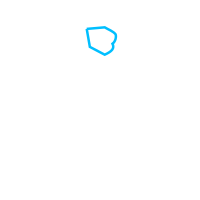

In [12]:
decode_z(z, model_path=model, data_folder="data/decomposed_svgs", do_display=True, return_svg=False, return_png=False)

### 2 Model

#### 2.1 Load ambeddings for training data

In [3]:
combined_embedding = pd.read_pickle('data/combined_embedding.pkl')

In [4]:
combined_embedding

,filename,animation_id,0,1,2,3,4,5,6,7,...,246,247,248,249,250,251,252,253,254,255
0,Ableton,1,0.999088,-3.647312,1.943437,-1.427582,0.235763,0.147010,-3.427875,-1.415471,...,-4.861924,-6.955129,0.178722,1.480048,1.658698,-2.688116,-1.818139,0.483364,-1.021382,0.807942
1,Ableton,0,0.716675,-2.136357,2.035006,-2.235287,-0.249549,-2.589223,-2.964693,-2.085697,...,-5.107700,-6.145383,0.806620,-0.387984,0.471549,-2.912267,-2.603213,-0.113537,-0.046964,2.062963
2,A&O Hotels and Hostels,1,0.392774,-1.993486,0.977245,-1.300846,-0.815418,0.189957,-1.640209,-1.261180,...,-3.632322,-5.625988,-0.048256,2.022904,1.145446,-2.707033,-1.062037,0.436135,1.144496,0.864589
3,A&O Hotels and Hostels,0,-1.267531,0.664335,-0.586723,-0.603000,-2.813056,-0.324393,-0.162084,-2.029147,...,-3.073321,-2.453578,0.825134,-1.391940,-0.481152,-2.813143,-1.524138,1.068881,0.523363,1.911017
4,Ableton,4,0.484945,-2.718677,1.177793,-1.981081,-0.394796,-0.214796,-4.011641,-2.098473,...,-5.154762,-7.863921,0.268913,1.604839,2.163260,-2.689683,-3.152629,-0.002783,-1.194627,1.738602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,Öger Group,9,0.501243,-1.818034,1.759739,2.331190,-1.661857,0.447471,-2.610717,-2.168237,...,-3.709549,-4.900559,-0.274134,-3.110418,-0.009820,-3.104049,-2.826110,1.584878,-3.025648,1.297592
2970,Öger Group,7,0.100549,-1.405265,1.535983,2.383574,-1.841391,1.079986,-2.301652,-2.281266,...,-3.049530,-5.041844,-0.579861,-2.501549,0.332780,-2.951898,-3.131474,0.866903,-2.807621,1.140946
2971,Öger Group,8,0.582206,-2.319556,1.587112,2.120214,-1.307429,1.662620,-2.815449,-2.224535,...,-2.598483,-4.649100,0.037339,-1.808706,0.583725,-2.538647,-2.944046,0.870587,-3.222914,0.853417
2972,ÖRAG,0,0.013261,1.916203,-0.021856,3.099442,-3.031816,1.833678,2.651020,0.025553,...,2.304443,-1.605999,-3.001702,0.152502,0.224020,-1.659434,-1.756564,0.024562,3.419873,1.353659


In [5]:
# reduce to easy SVGs (<= 1 paths) in order to speed up training
combined_embedding['animation_id'] = pd.to_numeric(combined_embedding['animation_id'])
easy_logos = set(np.unique(combined_embedding['filename'])[combined_embedding.groupby(['filename']).max()['animation_id']<=1])
emb_red = combined_embedding[combined_embedding['filename'].isin(easy_logos)].sort_values(['filename', 'animation_id'])
emb_red.reset_index(drop=True, inplace=True)

#### 2.2 Train model head using a genetic approach (multi-layer perceptron)

In [ ]:
# does not work in notebook --> model trained in command line
top_model = train_model_head(svg_dataset=emb_red, num_agents=50, top_parent_limit=10, generations=10)

#### 2.3 Load best model

In [6]:
top_model = torch.load('models/best_model_head.pkl')
top_model.eval()

MLP(
  (hidden): ModuleList(
    (0): Linear(in_features=256, out_features=192, bias=True)
  )
  (out): Linear(in_features=192, out_features=21, bias=True)
)

In [7]:
top_model.state_dict()

OrderedDict([('hidden.0.weight',
              tensor([[ 0.0076,  0.0289,  0.0170,  ...,  0.0203,  0.0292, -0.0056],
                      [-0.0067, -0.0460,  0.0577,  ...,  0.0217, -0.0407, -0.0215],
                      [ 0.0169,  0.0323, -0.0375,  ..., -0.0099,  0.0595,  0.0073],
                      ...,
                      [ 0.0548,  0.0456,  0.0066,  ...,  0.0304,  0.0248,  0.0197],
                      [-0.0138, -0.0294,  0.0223,  ..., -0.0268,  0.0083,  0.0513],
                      [ 0.0432,  0.0478, -0.0192,  ..., -0.0406, -0.0426,  0.0340]])),
             ('hidden.0.bias',
              tensor([-2.2902e-02, -3.3149e-02, -1.1399e-02, -5.9355e-02,  5.2337e-02,
                      -3.6455e-02, -9.0248e-03, -2.7904e-02,  5.9884e-02,  5.2173e-02,
                       3.2236e-02, -5.4138e-02,  2.0477e-02, -2.6128e-02,  3.4145e-02,
                       2.5280e-02,  2.1688e-02, -9.1288e-03,  4.8009e-02,  1.2749e-02,
                       3.5686e-02,  2.0622e-02,  4.233

### 3 Predict Animation

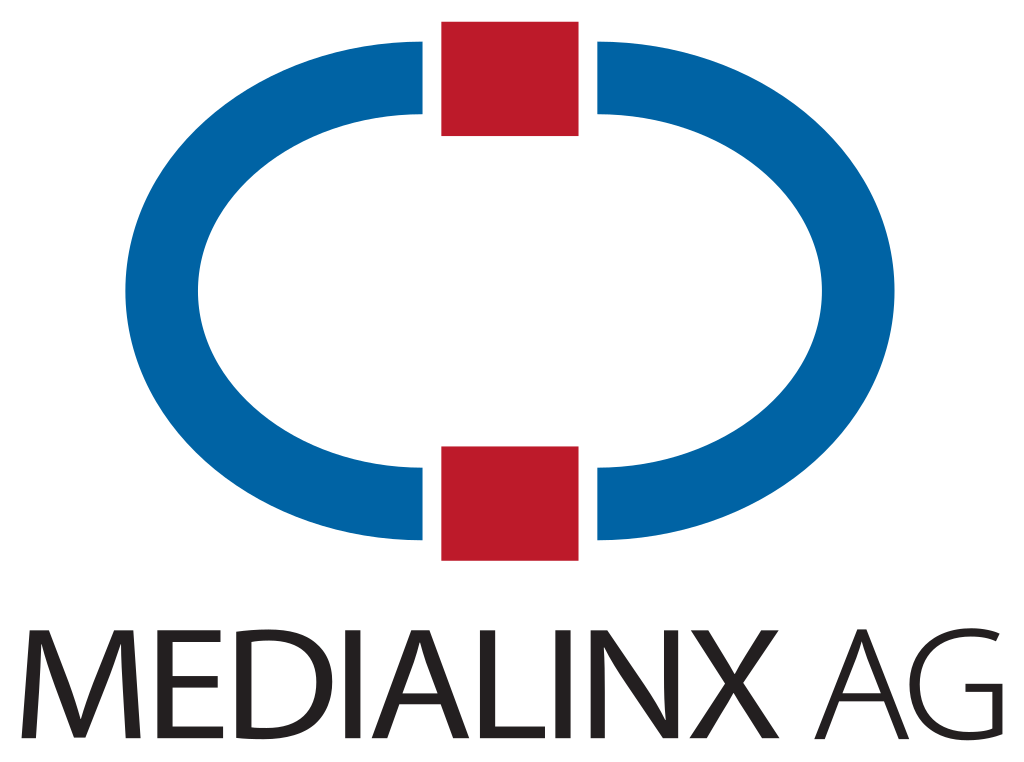

In [101]:
logo = "Medialinx"
display(SVG("data/svgs/{}.svg".format(logo)))

In [102]:
test_svg_emb = combined_embedding[combined_embedding['filename']==logo].reset_index(drop=True)

In [103]:
filenames = test_svg_emb.pop('filename')
animation_ids = test_svg_emb.pop('animation_id')

In [104]:
test_svg_emb

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.563757,-1.768812,1.506121,4.408497,-1.062406,3.181023,-1.300091,-2.521162,-1.283564,1.187977,...,0.250930,-1.042099,-1.188950,-1.877953,-0.523354,-1.410092,-2.927675,0.419966,-2.257641,-0.560514
1,0.298819,-1.786181,-0.038259,2.911652,-0.863827,2.861942,-0.474315,-2.679231,-0.489950,0.965575,...,-0.152078,-1.077933,0.105494,-0.155027,-0.165068,-1.519946,-2.285380,1.417801,-0.823834,-0.735331
2,1.358402,-2.766732,1.905443,1.412498,-0.009048,2.331789,-1.331299,-1.163686,-2.110078,1.019549,...,-0.956596,-4.502861,-1.355551,2.649507,1.290069,-1.755390,-1.528667,-0.197970,0.918779,-0.626989
3,0.959314,-2.771133,2.697232,-0.289001,0.271352,-0.834649,-1.263332,-3.151280,0.360092,0.024559,...,-3.257734,-2.721424,0.431391,-0.256923,-0.496558,-2.643723,-2.446285,0.514744,0.414599,0.025305


In [105]:
test_svg_emb = torch.tensor(test_svg_emb.to_numpy())

In [106]:
model_output = top_model(test_svg_emb).detach().numpy()
model_output

array([[0.6916755 , 0.718863  , 0.5744563 , 0.53521705, 0.6188371 ,
        0.5746964 , 0.43071625, 0.41253006, 0.56746906, 0.565687  ,
        0.69197786, 0.35446313, 0.5562474 , 0.45815834, 0.53877103,
        0.51349556, 0.52957934, 0.37370571, 0.24176486, 0.4433583 ,
        0.5724084 ],
       [0.627658  , 0.62473553, 0.47963265, 0.532212  , 0.6409525 ,
        0.49489707, 0.44915137, 0.42713323, 0.58501184, 0.62406963,
        0.67700595, 0.38695106, 0.5046298 , 0.4573637 , 0.5229219 ,
        0.48041537, 0.55903167, 0.47319382, 0.3105838 , 0.45134267,
        0.52149534],
       [0.654592  , 0.5926371 , 0.38848054, 0.52791095, 0.6381642 ,
        0.46610877, 0.4528762 , 0.45916906, 0.5977525 , 0.53880507,
        0.6659711 , 0.44747415, 0.38919413, 0.51429784, 0.4554083 ,
        0.56700903, 0.497769  , 0.5525225 , 0.45507595, 0.54293007,
        0.5218376 ],
       [0.5325052 , 0.453684  , 0.39282224, 0.5770776 , 0.64765495,
        0.5656296 , 0.59188104, 0.5433104 , 0.5363346

In [108]:
transform_binary_model_output(model_output[2])

('scale', 5, 5, 1, 'freeze', 0, 1, 2, 1.5)

In [109]:
insert_animation('data/svgs/{}.svg'.format(logo),animation_ids[2],model_output[2])

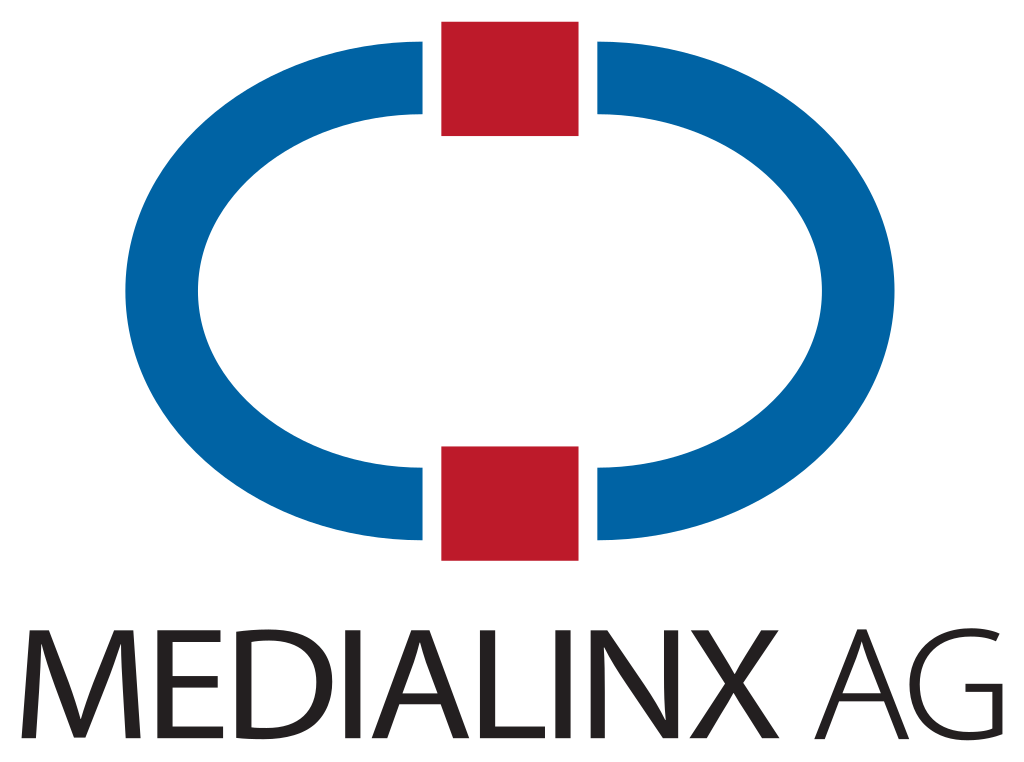

In [110]:
display(SVG("data/animated_logos/{}.svg".format(logo)))